**Project Aim** <br>
This notebooks is to apply Support Vector Machines to a Classification problem

We will develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. The problem as been reformatted as a binary classification problem.

**Data Description** 
For this problem, we use the MNIST data which is a large database of handwritten digits. The 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label. Each feature represents the pixal intensity from 0 (white) to 255 (black)

Since each image is of 28 x 28 pixels, and each pixel forms a feature, there are 784 features. MNIST digit recognition is a well-studied problem in the ML community, and people have trained numerous models (Neural Networks, SVMs, boosted trees etc.) achieving error rates as low as 0.23% (i.e. accuracy = 99.77%, with a convolutional neural network).

We'll first explore the dataset a bit, prepare it (scale etc.) and then experiment with linear and non-linear SVMs with various hyperparameters. Requirement to shuffle the data for different CV folds to ensure that each fold contains features for each class 

**Project Assumptions**

**Project Objective**
- Basic EDA of the MNIST Dataset
    - How should pixal data be analysed? 
    - Plot example of the pixel data
    - What columns are identical or have very similar distributions?
- Benchmark model
   - Majority Class
   - Stochastic Gradient Descent Classifier (good for large datasets and online learning)
- Understand the framework of support vector machines 
    - Build a model that overfits a small proporion of the dataset and how to reach this conclusion
    - Stratified Sampling
    - Understand methods to select features for classification problems
    - Include bias/variance trade off analysis
    - Cross Validation Strategy (Shuffle data & Stratified Sample)
- Application of multiple Kernal Types and model performance analysis
    - Understand and apply an appropriate loss function
        - Hinge Loss
    - Feature Selection/Scaling
    - Add randomised features
    - Implement Scaling/Normalisation using Sci-kit learn Pipeline
- Hyperparameter Tuning (Implement and understand grid search plus evaluate where the model over/underfits)
    - Grid Search for parameters (page 72 - Hands on ML): Determine which parameters need to be optimised
- Investigate if SVM model can be plotted 
    - Error evaluation: Where does the system commonly make mistakes and how can this be improved?
        - Confusion Matrix 
        - Precision-Recall Curve
        - RoC Curve
    - Feature Importance
    - Decision boundary
- Tidy up the final solution 
    - Neatly store: Date/Data set/Pickle Model
- Document brief conclusions
- Document and understand 3 key learning from other kaggle solutions <br>
    https://www.kaggle.com/nishan192/mnist-digit-recognition-using-svm  <br>
    https://www.kaggle.com/azzion/svm-for-beginners-tutorial  <br>
    https://www.kaggle.com/fengdanye/machine-learning-4-support-vector-machine  <br>
    https://www.kaggle.com/residentmario/kernels-and-support-vector-machine-regularization  <br>

**Support Vector Machine Notes**
- Hands-On Machine Learning with Scikit-Learn & Tensorflow
- Mastering Predictive Analytics with R
- Andrew Ng SVM <br>
    https://www.youtube.com/watch?v=XfyR_49hfi8&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=74 <br>

**Parameters**
- Choice of parameter C
- Choice of kernel
    - Linear SVM uses no Kernel: Standard linear classifier (use when large number of features but small dataset)
    - Gaussian: Will require selection of parameter sigma^2 (use when small number of features but large training set)
        - **Perform feature scaling before implementing a gaussian kernel**

**Algorithm Performance on MNIST Dataset** <br>
- For MNIST Data set there is no need to create dummy variables or handle missing data as data set doesn't have any missing data
- SVM will be used in relation to a binary classification problem for the initial project 
- Note that pictures can be sensitive to rotation and imageing shifting which can increase likelihood of error

**Model Performances** <br>
- Benchmark Model: Most Frequent Class (~0.5%) Accuracy
- Personal Model Performance (sub sample of 2000 rows with 75 columns)
    - SVC(kernel='linear') <br>
      Train Results
      > SVC(kernel='linear') 0.880 (0.038) <br>
      > Train Linear Kernel the parameters {'C': 1, 'gamma': 0.01} are the best and the best score is 0.88 <br>
      > Cross Validation Results [0.9 0.925 0.85 0.85 0.8 0.925 0.875 0.875 0.875 0.925] <br>
      > Train Data Accuracy: 0.92 <br>

      Testing Results
      > SVC(kernel='linear') 0.898 (0.018) <br>
      > Cross Validation Results [0.9125 0.9 0.90625 0.89375 0.88125 0.90625 0.86875 0.875 0.90625 0.93125] <br>
      > Test Data Accuracy: 0.885625 <br>
      
    - RBF Kernel the parameters 
      > Train RBF Kernel the parameters {'C': 25, 'gamma': 0.01} are the best and the best score is 0.93 <br>
- Optimal Performance (Kaggle): Error rates as low as 0.23% (99.77 Accuracy)

**Conclusions**
- Limited EDA required due to the data being pixals. Basic checks performed and limited feature enginerring required
- Similar perfoamnce between the RBF SVM and GBM suggesting that a non-linear model is better suited to classifying ones from threes. Performance between SVM and GBM is comparable however one fold of GBM resulted in 97% accuracy giving tree-based models the edge. However model performance of SVM is generally smaller therefore, potentially more stable
- Increasing the number of features from 50 to 75 significant increased model performance
- Dummy features added to portarty relevant importance of features. Generally these rank a lot lower than the other 'true' features meaning the predictors perform better than random
- The regularisation term C increases from 1 to 25 when using RBF in replacement of Linear Kernal 
- Test dataset was used as validation hold out. This seems overly sensitive to predicting class 3 and never predicts class 1
- Potential Gotchas
    - Columns with Zero Variance
    - Train and test having different columns
    - SVM prefer a form of feature scaling to be implemented 
    - Feature importance for SVM only works with Linear Kernels
    - Encoding of target label required 
    
**New Techniques**
- Dummy classifier function in Sklearn
- Clean method to run multiple models in sequence and store results 
- Precision-Recall Curves
- Grid Search Visualisations
- Plotting of decision boundaries 

**Out of Scope**
- Missing data treatment 
- Outlier treatment
- Feature transformations and interactions (product/sum etc.)

**Next Steps**
- Create a single x_train, y_train, x_test, y_test set for uniformity
- Understand why the model predicts class 1 rarely for the validation dataset
- Explicitly implement a check for Zero-Variance Predictors 
- Implement treatment to deal with sparse matrix (a lot of columns have over 90% zero entries within selected 75 columns)
- Create a function that makes is simple to:
    - Add more features for MNIST Dataset
    - Increase the number of rows in the data set (Test dataset suffering from data sparstity)
- Implement an approach to incrementally add data points individually and determine the minimum sample size required for (near) optimal perforance (see SKLearn pg 124 Learning Curves)
- Add features specifically for computer vision projects 
- Implement dimension reduction algorithms
- Update to a multiclassification problem through additional labels
- Sci-Kit Learns Transformation Pipeline (page 66 - Hands on ML with Sci-kit Learn sklearn.pipeline import Pipeline)


**References** <br>
    https://www.kaggle.com/jwlee508/data-analysis-for-kaggle-mnist <br> 
    https://towardsdatascience.com/an-intro-to-kernels-9ff6c6a6a8d <br>
    https://www.researchgate.net/publication/230800948_The_Secrets_to_Managing_Business_Analytics_Projects <br>
    https://towardsdatascience.com/one-potential-cause-of-overfitting-that-i-never-noticed-before-a57904c8c89d <br>
    https://www.kaggle.com/residentmario/kernels-and-support-vector-machine-regularization <br>
    https://www.kaggle.com/nishan192/mnist-digit-recognition-using-svm <br>

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# spot check machine learning algorithms on the adult imbalanced dataset
# https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/
from numpy import mean
from numpy import std
from matplotlib import pyplot

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

import pickle

In [3]:
os.getcwd()

'/Users/Rej1992/Documents/GitHub/SupportVectorMachines/notebooks'

In [4]:
train_data = pd.read_csv('/Users/Rej1992/Documents/SupportVectorMachines_RawData/mnist_train.csv')
test_data = pd.read_csv('/Users/Rej1992/Documents/SupportVectorMachines_RawData/mnist_test.csv')

In [5]:
print(train_data.shape)
print(test_data.shape)

(60000, 785)
(10000, 785)


In [6]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


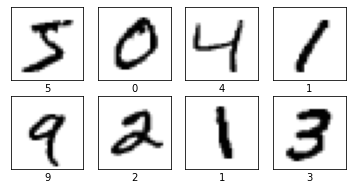

In [7]:
X_t = train_data.drop(["label"], axis=1)
Y_t = train_data.label.values

plt.figure(figsize=(6,3))
X = X_t.to_numpy().reshape(60000, 28, 28)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(str(Y_t[i]))
plt.show()

<AxesSubplot:xlabel='label'>

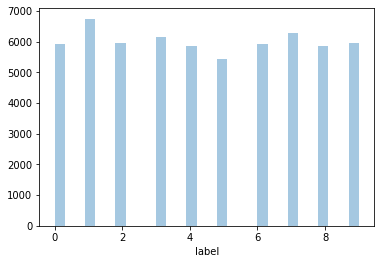

In [8]:
sns.distplot(train_data['label'], kde = False, bins = 30)

In [9]:
train_data = train_data[(train_data.label == 1) | (train_data.label == 3)]
test_data = test_data[(test_data.label == 1) | (test_data.label == 3)]

In [11]:
# Create a representative sample of the data set
train_data = train_data.sample(n = 2000, replace = False) 
test_data = test_data.sample(n = 2000, replace = False) 

In [12]:
# Remove duplicated columns 
train_data = train_data.loc[:,~train_data.columns.duplicated()]
test_data = test_data.loc[:,~test_data.columns.duplicated()]

In [13]:
def _remove_columns_unique_values(data):
    
    nunique = data.apply(pd.Series.nunique)
    cols_to_drop = nunique[nunique == 1].index
    
    return data.drop(cols_to_drop, axis=1)

test_data = _remove_columns_unique_values(test_data)
train_data = _remove_columns_unique_values(train_data)

In [14]:
# Check column overlap
print(test_data.columns.difference(train_data.columns))
print(train_data.columns.difference(test_data.columns))

Index(['11x25', '12x25', '14x3', '16x26', '16x27', '17x26', '17x27', '18x26',
       '20x27', '21x27', '24x2', '27x10', '27x8', '27x9', '28x10', '28x11',
       '28x13', '28x9', '3x10', '3x11', '3x16', '4x24', '4x25', '5x4', '6x2',
       '6x3', '9x3'],
      dtype='object')
Index(['10x26', '10x27', '11x26', '11x27', '12x26', '12x27', '12x28', '12x3',
       '13x25', '13x26', '13x27', '13x28', '13x3', '14x26', '14x27', '15x4',
       '17x2', '18x2', '19x1', '19x2', '20x1', '20x2', '20x26', '21x26',
       '22x26', '23x25', '23x26', '24x25', '24x26', '24x27', '25x24', '25x26',
       '25x27', '25x3', '26x22', '26x23', '26x3', '27x20', '27x21', '27x22',
       '6x26', '7x3'],
      dtype='object')


In [15]:
# Retain only columns that exist in the test data set
train_data = train_data.drop(train_data.columns.difference(test_data.columns), axis=1)
test_data = test_data.drop(test_data.columns.difference(train_data.columns), axis=1)

In [16]:
# Verfiy the data type 
train_data.dtypes.unique()

array([dtype('int64')], dtype=object)

In [17]:
# Remove missing targets
train_data = train_data[train_data.label.notnull()]

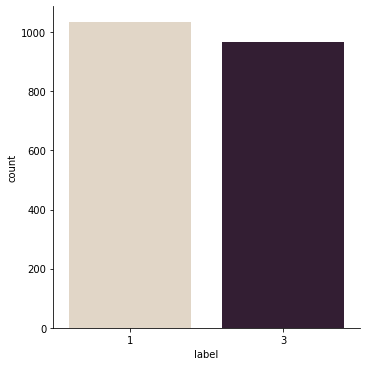

In [18]:
# Analyse the distribution of the target
sns.catplot(x="label", kind="count", palette="ch:.25", data=train_data)

In [27]:
train_data = train_data.iloc[:, : 75] # Train on first 75 columns
test_data = test_data.iloc[:, : 75] # Train on first 75 columns

In [28]:
train_data.std().sort_values(ascending=False).head(10) 

6x15    110.987357
6x14    109.742089
6x16    109.054823
6x17    108.618356
7x12    108.612171
6x18    106.407911
6x13    105.504277
7x11    103.177843
6x19    100.096969
6x12     98.139321
dtype: float64

In [29]:
# Check the proportion of 0 per rowa nd column due to data sparsity 
print('rows')
print(train_data[train_data == 0].count(axis=1)/len(train_data.columns))
print('cols')
print(train_data[train_data == 0].count(axis=0)/len(train_data.index))

rows
6877     0.906667
38027    0.880000
34337    0.906667
37365    0.933333
58741    0.920000
           ...   
30486    0.946667
12041    0.866667
47993    0.880000
19905    0.733333
19010    0.933333
Length: 2000, dtype: float64
cols
label    0.0000
3x12     0.9995
3x13     0.9990
3x14     0.9985
3x15     0.9985
          ...  
7x8      0.8420
7x9      0.7700
7x10     0.6925
7x11     0.6275
7x12     0.5625
Length: 75, dtype: float64


In [30]:
train_data.describe()

,label,3x12,3x13,3x14,3x15,4x6,4x7,4x8,4x9,4x10,...,6x25,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.965000,0.00750,0.122000,0.356000,0.052500,0.03650,0.116000,0.169500,0.183000,0.463000,...,0.41650,0.592500,2.437000,6.16250,13.144500,24.705500,38.50200,53.798500,68.977000,83.172000
std,0.999637,0.33541,5.131402,9.190783,1.527059,1.63233,5.187678,5.690163,5.925628,8.945482,...,9.29641,10.301238,21.258857,33.67679,48.876805,66.806821,82.38425,93.801921,103.177843,108.612171
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,3.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,67.250000,161.000000,215.000000
max,3.000000,15.00000,229.000000,245.000000,59.000000,73.00000,232.000000,230.000000,254.000000,254.000000,...,253.00000,254.000000,255.000000,255.00000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


<AxesSubplot:>

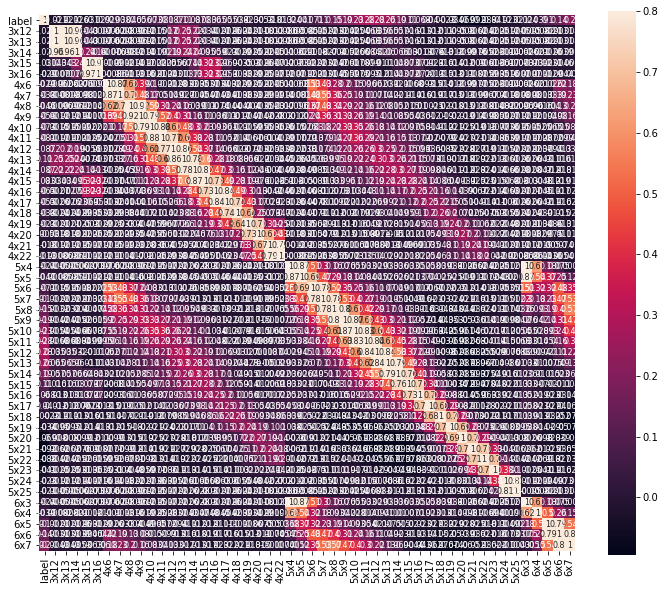

In [21]:
corrmat = train_data.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,
            vmax=0.8,
            square=True,
            annot=True,
            annot_kws={'size':8})

In [31]:
# Feature Engineering 
## Discretise continuous variables 
## Create a set of randomised features 
random.seed(1234)
train_data['uniform_random'] = np.random.uniform(0,1,len(train_data))
train_data['log_norm_random'] = np.random.lognormal(0, 1, len(train_data))
train_data['norm_random'] = np.random.normal(0, 1, len(train_data))

# Validation DataSet
test_data['uniform_random'] = np.random.uniform(0,1,len(test_data))
test_data['log_norm_random'] = np.random.lognormal(0, 1, len(test_data))
test_data['norm_random'] = np.random.normal(0, 1, len(test_data))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [32]:
# Establish X and y & label encode the target variable to have the classes 0 and 1
train_data.label = np.where(train_data.label == 1, 0, 1) # 0 == 1 and 1 == 3
y = LabelEncoder().fit_transform(train_data.label)
X = train_data.drop('label', 1)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
# Create a benchmark dummy model
random.seed(1234)

def _generate_dummy_model(X=X, y=y):
    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.2, random_state = 10)

    for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
        dummy_maj = DummyClassifier(strategy=strat).fit(X_train, y_train)
        print(strat)
        print("Train Stratergy :{} \n Score :{:.2f}".format(strat, dummy_maj.score(X_train, y_train)))
        print("Test Stratergy :{} \n Score :{:.2f}".format(strat, dummy_maj.score(X_train, y_train)))
        print("Cross Validation: Training Data \n ", cross_val_score(dummy_maj, X_train, y_train, cv = 10, scoring = 'accuracy'))
        print("""""")
        
_generate_dummy_model()

stratified
Train Stratergy :stratified 
 Score :0.45
Test Stratergy :stratified 
 Score :0.48
Cross Validation: Training Data 
  [0.425 0.4   0.475 0.475 0.625 0.575 0.4   0.6   0.45  0.475]

most_frequent
Train Stratergy :most_frequent 
 Score :0.54
Test Stratergy :most_frequent 
 Score :0.54
Cross Validation: Training Data 
  [0.525 0.525 0.525 0.525 0.525 0.525 0.55  0.55  0.55  0.55 ]

prior
Train Stratergy :prior 
 Score :0.54
Test Stratergy :prior 
 Score :0.54
Cross Validation: Training Data 
  [0.525 0.525 0.525 0.525 0.525 0.525 0.55  0.55  0.55  0.55 ]

uniform
Train Stratergy :uniform 
 Score :0.55
Test Stratergy :uniform 
 Score :0.48
Cross Validation: Training Data 
  [0.45  0.375 0.575 0.575 0.6   0.45  0.475 0.525 0.45  0.6  ]



In [34]:
# Define models to test: Support Vector Machine 
def get_models():
    models, names = list(), list()
    
    # DummyClassifier
    models.append(DummyClassifier(strategy='most_frequent')) # Best performing dummy classifier
    names.append('Dummy_MostFreq')
    
    # Stochastic Gradient Descent Classifier (This should be equal to )
    models.append(SGDClassifier(loss="hinge", penalty="l2"))
    names.append('SGD_Classifier')
    
    # SVM Linear Kernel
    models.append(SVC(kernel='linear'))
    names.append('SVM_Linear')
    
    # SVM
    #models.append(SVC(kernel='rbf', gamma='scale'))
    #names.append('SVM_Gamma')
    
    # GBM
    models.append(GradientBoostingClassifier(n_estimators=100))
    names.append('GBM')
    
    return models, names

In [35]:
# evaluate each model
models = get_models()[0]
names = get_models()[1]

train_results = []
test_results = []

y_preds_train = []
y_preds_test = []

def _generate_model_results(algorithm=models, model_name=names, predictors=X, target=y):
    
    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2, random_state=10)
    
    
    for i in range(len(models)):    
        # Fit the model -- Function 1
        model = models[i].fit(X_train, y_train)
        print(model)
        

        # Create y_preds 
        y_preds_train = model.predict(X_train)
        y_preds_test = model.predict(X_test)

        X['model_actuals'] = np.hstack([y_train, y_test]) # Actuals 
        X.loc[:, names[i]] = np.hstack([y_preds_train, y_preds_test]) # Model Predictions
        
        
        # Cross Validate and produce results
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
        train_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        test_scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

        train_results.append(train_scores)
        test_results.append(test_scores)

        print("""Train Results""")
        print('> %s %.3f (%.3f)' % (model, mean(train_scores), std(train_scores)))
        print(train_scores)
        print("Train Data Accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_preds_train), "\n")

        print("""Testing Results""")
        print('> %s %.3f (%.3f)' % ('Model', mean(test_scores), std(test_scores)))
        print(test_scores)
        print("Test Data Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_preds_test), "\n")
        
    # plot the results
    plt.boxplot(train_results, labels=names, showmeans=True)
    plt.show()
        
    # Save Results into Folder
    X.to_csv('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/Results/BaselineModelResults.csv')  
        
    return X#, y_test, y_preds_test

DummyClassifier(strategy='most_frequent')
Train Results
> DummyClassifier(strategy='most_frequent') 0.535 (0.012)
[0.525 0.525 0.525 0.525 0.525 0.525 0.55  0.55  0.55  0.55 ]
Train Data Accuracy: 0.535 

Testing Results
> Model 0.513 (0.002)
[0.51875 0.5125  0.5125  0.5125  0.5125  0.5125  0.5125  0.5125  0.5125
 0.5125 ]
Test Data Accuracy: 0.513125 

SGDClassifier()
Train Results
> SGDClassifier() 0.823 (0.047)
[0.875 0.8   0.725 0.825 0.85  0.85  0.8   0.8   0.8   0.9  ]
Train Data Accuracy: 0.9175 

Testing Results
> Model 0.847 (0.034)
[0.8375  0.85625 0.8625  0.8875  0.7875  0.85625 0.84375 0.85    0.9
 0.79375]
Test Data Accuracy: 0.86125 

SVC(kernel='linear')
Train Results
> SVC(kernel='linear') 0.878 (0.031)
[0.925 0.9   0.85  0.9   0.85  0.9   0.85  0.825 0.9   0.875]
Train Data Accuracy: 0.9125 

Testing Results
> Model 0.897 (0.030)
[0.91875 0.85    0.90625 0.91875 0.8625  0.85625 0.89375 0.9     0.9375
 0.93125]
Test Data Accuracy: 0.86875 

GradientBoostingClassifier()


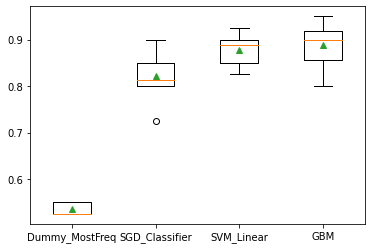

,3x12,3x13,3x14,3x15,4x6,4x7,4x8,4x9,4x10,4x11,...,7x11,7x12,uniform_random,log_norm_random,norm_random,model_actuals,Dummy_MostFreq,SGD_Classifier,SVM_Linear,GBM
6877,0,0,0,0,0,0,0,0,0,0,...,0,0,0.325755,0.854936,1.132963,1,0,1,1,1
38027,0,0,0,0,0,0,0,0,0,0,...,0,0,0.203000,2.000926,1.070551,0,0,0,0,0
34337,0,0,0,0,0,0,0,0,0,0,...,0,0,0.323301,0.460626,-1.126036,1,0,1,1,1
37365,0,0,0,0,0,0,0,0,0,0,...,0,0,0.884799,0.367890,2.189897,1,0,1,1,1
58741,0,0,0,0,0,0,0,0,0,0,...,0,0,0.878691,0.640900,-0.680741,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30486,0,0,0,0,0,0,0,0,0,0,...,0,0,0.526681,0.359204,-1.173229,0,0,0,0,0
12041,0,0,0,0,0,0,0,0,0,0,...,0,0,0.401347,0.158633,-1.034842,1,0,1,1,1
47993,0,0,0,0,0,0,0,0,0,0,...,0,0,0.455429,3.077027,-0.256651,1,0,1,1,1
19905,0,0,0,0,0,0,0,0,0,0,...,252,252,0.547247,0.933948,-0.482438,1,0,1,1,1


In [36]:
_generate_model_results()

In [29]:
# Confusion Matrix -- Function 4
for i in names:
    print(i)
    print(confusion_matrix(X.model_actuals, X[i]))
    print("""""")

Dummy_MostFreq
[[1045    0]
 [ 955    0]]

SGD_Classifier
[[876 169]
 [151 804]]

SVM_Linear
[[1007   38]
 [ 177  778]]

GBM
[[1023   22]
 [ 124  831]]



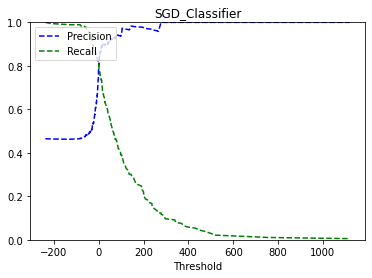

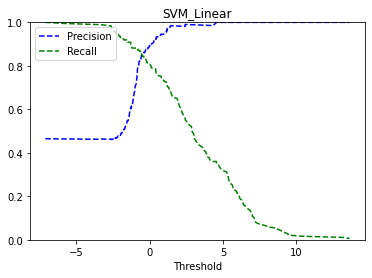

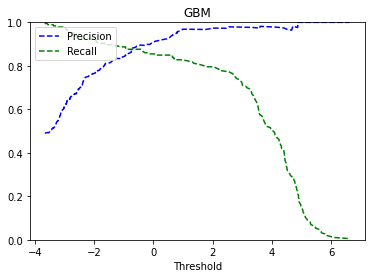

In [37]:
## Precision-Recall Curves
precisions = []
recalls = []
thresholds = []

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

def _generate_precision_recall_results(algorithm=models, predictors=X, target=y, name = names):
    
    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)
    
    # Cross Validation Strategy
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2, random_state=10)
    
    for i in range(len(models)):    
        # Fit the model -- Function 1
        model = models[i].fit(X_train, y_train)
        
        if(i != 0):
            y_decision_func = cross_val_predict(model,  X_train, y_train, method='decision_function', cv=cv)
            
            # Create the results for precision and recall
            precisions, recalls, thresholds = precision_recall_curve(y_train, y_decision_func)
            
            # Create a plot
            plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
            plt.title(name[i])
            plt.show()
        
_generate_precision_recall_results()

RoC_AuC_Score:  SGD_Classifier 0.8655913978494624
RoC_AuC_Score:  SVM_Linear 0.8864686966134057
RoC_AuC_Score:  GBM 0.9382850969751783


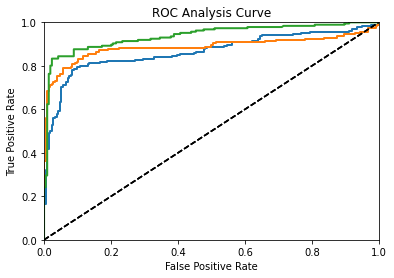

In [39]:
fpr = []
tpr = []
roc_thresholds = []

def plot_roc_curve(fpr, tpr, roc_thresholds, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

def _generate_roc_results(algorithm=models, predictors=X, target=y, name = names):
    
    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)
    
    # Cross Validation Strategy
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2, random_state=10)
    
    for i in range(len(models)):    
        # Fit the model -- Function 1
        model = models[i].fit(X_train, y_train)
        
        # # RoC Curve --- Binary Classifiers & Recall Versus False Positive Rate (Ratio of negative instances that are incorrectly classified as positive)
        if(i != 0):
            y_decision_func = cross_val_predict(model,  X_train, y_train, method='decision_function', cv=cv)
            fpr, tpr, roc_thresholds = roc_curve(y_train, y_decision_func)
            
            print('RoC_AuC_Score: ', name[i],roc_auc_score(y_train, y_decision_func))
            
            plot_roc_curve(fpr, tpr, roc_thresholds)
            #plt.legend(name[i])
            plt.title('ROC Analysis Curve')
            plt.show
        
_generate_roc_results()

In [40]:
#Attempt differing values of C
def _save_model_to_pickle(model, model_type):
    filename = dt.datetime.now().strftime('%Y-%m-%d')+'_'+model_type+'_GridSearch_SVM_model.pkl'
    pickle.dump(model, open('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/data/04_models/'+filename, 'wb'))


def _hyperparam_grid_search(model_type):
    # Save Processed Data to Folder
    X.to_csv('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/data/03_processed/'+dt.datetime.now().strftime('%Y-%m-%d')+'_'+'CleanPredictorData.csv')

    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)

    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.2, random_state = 10)

    # creating a RepeatedStratifiedKFold object with 10 splits 
    folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

    # Grid Search
    # specify range of hyperparameters
    hyper_params = [{'C': [1,5,7,10,15,25,50],
                     'gamma': [0.01, 0.05, .1,.5,.10,.25,.50,1]}]
    
    if(model_type == 'SVM_Linear'):
        model = SVC(kernel='linear')
        print(model)
        
        
    elif(model_type == 'gamma'):
        model = SVC(kernel='rbf')
        print(model)

    model_cv = GridSearchCV(estimator = model, 
                            param_grid = hyper_params, 
                            scoring = 'accuracy', 
                            cv = folds, 
                            verbose = 1,
                            return_train_score=True) 
    
    # Save Model to pickle 
    _save_model_to_pickle(model_cv, model_type)
    
    # fit the model
    model_cv.fit(X_train, y_train)

    print("the parameters {} are the best.".format(model_cv.best_params_))
    print("the best score is {:.2f}.".format(model_cv.best_score_))

    # cv results
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results.to_csv('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/data/05_model_output/'+dt.datetime.now().strftime('%Y-%m-%d')+'_'+model_type+'GridSearchResults.csv')
    
    # Model Score
    scoretrain = model_cv.score(X_train, y_train)
    scoretest  = model_cv.score(X_test, y_test)
    
    print(scoretrain)
    print(scoretest)
    
    #scoretrain.to_csv('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/Results/'+dt.datetime.now().strftime('%Y-%m-%d')+'_'+model_type+'TrainGridSearchResults.csv')
    #scoretest.to_csv('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/Results/'+dt.datetime.now().strftime('%Y-%m-%d')+'_'+model_type+'TestGridSearchResults.csv')
    
    return cv_results, model_cv, scoretrain, scoretest

In [41]:
SVMLinearGridResults = _hyperparam_grid_search('SVM_Linear')

SVC(kernel='linear')
Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


the parameters {'C': 1, 'gamma': 0.01} are the best.
the best score is 0.86.
0.92
0.87125


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:  1.3min finished


In [42]:
SVMLinearGridResults[0] # Save to Results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.011484,0.001836,0.000782,0.000172,1,0.01,"{'C': 1, 'gamma': 0.01}",0.925,0.85,0.825,...,0.930556,0.922222,0.930556,0.927778,0.922222,0.925000,0.927778,0.916667,0.923889,0.005000
1,0.013014,0.003079,0.000760,0.000074,1,0.05,"{'C': 1, 'gamma': 0.05}",0.925,0.85,0.825,...,0.930556,0.922222,0.930556,0.927778,0.922222,0.925000,0.927778,0.916667,0.923889,0.005000
2,0.011812,0.002057,0.000705,0.000080,1,0.1,"{'C': 1, 'gamma': 0.1}",0.925,0.85,0.825,...,0.930556,0.922222,0.930556,0.927778,0.922222,0.925000,0.927778,0.916667,0.923889,0.005000
3,0.012113,0.001950,0.000762,0.000155,1,0.5,"{'C': 1, 'gamma': 0.5}",0.925,0.85,0.825,...,0.930556,0.922222,0.930556,0.927778,0.922222,0.925000,0.927778,0.916667,0.923889,0.005000
4,0.012768,0.001919,0.000780,0.000145,1,0.1,"{'C': 1, 'gamma': 0.1}",0.925,0.85,0.825,...,0.930556,0.922222,0.930556,0.927778,0.922222,0.925000,0.927778,0.916667,0.923889,0.005000
5,0.011714,0.001622,0.000871,0.000167,1,0.25,"{'C': 1, 'gamma': 0.25}",0.925,0.85,0.825,...,0.930556,0.922222,0.930556,0.927778,0.922222,0.925000,0.927778,0.916667,0.923889,0.005000
6,0.011903,0.002000,0.000802,0.000080,1,0.5,"{'C': 1, 'gamma': 0.5}",0.925,0.85,0.825,...,0.930556,0.922222,0.930556,0.927778,0.922222,0.925000,0.927778,0.916667,0.923889,0.005000
7,0.011610,0.001895,0.000839,0.000084,1,1,"{'C': 1, 'gamma': 1}",0.925,0.85,0.825,...,0.930556,0.922222,0.930556,0.927778,0.922222,0.925000,0.927778,0.916667,0.923889,0.005000
8,0.053531,0.031779,0.000906,0.000210,5,0.01,"{'C': 5, 'gamma': 0.01}",0.925,0.85,0.800,...,0.938889,0.925000,0.930556,0.927778,0.930556,0.947222,0.933333,0.933333,0.931667,0.006713
9,0.051008,0.032497,0.000992,0.000471,5,0.05,"{'C': 5, 'gamma': 0.05}",0.925,0.85,0.800,...,0.938889,0.925000,0.930556,0.927778,0.930556,0.947222,0.933333,0.933333,0.931667,0.006713


In [43]:
GammaGridResults = _hyperparam_grid_search('gamma')[0]

SVC()
Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


the parameters {'C': 5, 'gamma': 0.05} are the best.
the best score is 0.90.
0.99
0.914375


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:   15.7s finished


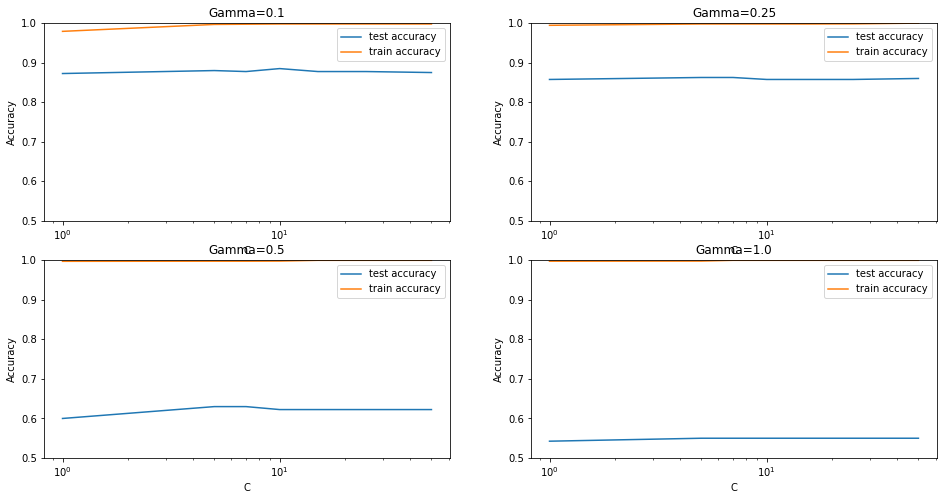

In [44]:
GammaGridResults['param_C'] = GammaGridResults['param_C'].astype('int')

# plot with various axes scales
plt.figure(figsize=(16,8))

# subplot 1/4
plt.subplot(221)
gamma_01 = GammaGridResults[GammaGridResults['param_gamma']==0.1]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper right')
plt.xscale('log')


# subplot 2/4
plt.subplot(222)
gamma_025 = GammaGridResults[GammaGridResults['param_gamma']==0.25]

plt.plot(gamma_025["param_C"], gamma_025["mean_test_score"])
plt.plot(gamma_025["param_C"], gamma_025["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.25")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper right')
plt.xscale('log')


# subplot 3/4
plt.subplot(223)
gamma_05 = GammaGridResults[GammaGridResults['param_gamma']==0.5]

plt.plot(gamma_05["param_C"], gamma_05["mean_test_score"])
plt.plot(gamma_05["param_C"], gamma_05["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.5")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper right')
plt.xscale('log')


# Subplot 4/4
plt.subplot(224)
gamma_1 = GammaGridResults[GammaGridResults['param_gamma']==1.0]

plt.plot(gamma_1["param_C"], gamma_1["mean_test_score"])
plt.plot(gamma_1["param_C"], gamma_1["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=1.0")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper right')
plt.xscale('log')

In [45]:
# Normalisation/Standardisation --- Implement Feature Scaling
feature_import_data = train_data.drop('label', axis = 1)
feature_import_data_scaled = scale(feature_import_data) 

# train test split
X_train, X_test, y_train, y_test = train_test_split(feature_import_data_scaled, 
                                                    y, 
                                                    train_size = 0.2, 
                                                    random_state = 10)

# model with optimal hyperparameters
model = SVC(C=50, gamma=0.1, kernel="rbf")

# Save Model to pickle 
_save_model_to_pickle(model, 'Optimised_rbfKernal_Model')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("Model Accuracy: \n", metrics.accuracy_score(y_test, y_pred), "\n")
print("Confusion Matrix Results: \n", metrics.confusion_matrix(y_test, y_pred), "\n")

print("---------------- Validation Data Set Results ---------------------")
## Check the model performance on the Validation dataset
test_data.label = np.where(test_data.label == 1, 0, 1) # 0 == 1 and 1 == 3
y_validate = LabelEncoder().fit_transform(test_data.label)
X_validate = test_data.drop('label', 1)

y_pred_validate = model.predict(X_validate)

# metrics
print("Validate Model Accuracy: \n", metrics.accuracy_score(y_validate, y_pred_validate), "\n")
print("Validate Confusion Matrix Results: \n", metrics.confusion_matrix(y_validate, y_pred_validate), "\n")

Model Accuracy: 
 0.906875 

Confusion Matrix Results: 
 [[724  97]
 [ 52 727]] 

---------------- Validation Data Set Results ---------------------
Validate Model Accuracy: 
 0.4705 

Validate Confusion Matrix Results: 
 [[   1 1047]
 [  12  940]] 



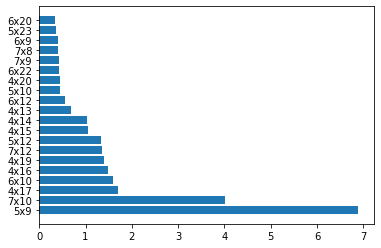

In [46]:
#Building and Evaluating the Final Model
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# Normalisation/Standardisation --- Implement Feature Scaling
feature_import_data = train_data.drop('label', axis = 1)
feature_import_data_scaled = scale(feature_import_data) 

# train test split
X_train, X_test, y_train, y_test = train_test_split(feature_import_data_scaled, 
                                                    y, 
                                                    train_size = 0.2, 
                                                    random_state = 10)

# Feature Importance Analysis: Attribute coef_ for SVM classifier but it only works for SVM with linear kernel
feature_names = list(feature_import_data.columns)

linear_svm = SVC(kernel='linear', C=50)
linear_svm.fit(X_train, y_train)
linear_svm.coef_[0]

# Specify your top n features you want to visualize.
# You can also discard the abs() function if you are interested in negative contribution of features
f_importances(abs(linear_svm.coef_[0]), feature_names, top=20)

In [64]:
# Train and Test Data Decision Boundary: Highlighting Test Data Points 
# Loading some example data
X, y = train_data[['7x9','7x8']], train_data.label

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.2, 
                                                    random_state = 10)

# Training a classifier
linear_svm = SVC(kernel='linear', C=50)
linear_svm.fit(X_train, y_train)

# Plotting decision regions
plot_decision_regions(X.to_numpy(), 
                      y.to_numpy(), 
                      clf=linear_svm, 
                      legend=2, 
                      X_highlight=X_test[['7x9','7x8']].to_numpy()
                     )

# Adding axes annotations
plt.xlabel('7x9')
plt.ylabel('7x8')
plt.title('SVM on Iris')
plt.show()

ValueError: 'gamma' is not in list